In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

car_df = pd.read_csv("cardata.csv")

car2_df = pd.read_csv("car_data4.csv")

In [2]:
car2_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
car2_df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   mileage        7907 non-null   object
 8   engine         7907 non-null   object
dtypes: int64(3), object(6)
memory usage: 571.6+ KB


In [5]:
car_df = car_df.dropna()

In [6]:
car2_df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [7]:
car_df = car_df.loc[car_df["fuel"].isin(["Diesel", "Petrol"])]

In [8]:
car_df["fuel"].value_counts()

Diesel    4299
Petrol    3520
Name: fuel, dtype: int64

In [13]:
car_df["transmission"].value_counts()

Manual       6778
Automatic    1041
Name: transmission, dtype: int64

In [14]:
car_df.corr()

,year,selling_price,km_driven
year,1.000000,0.413017,-0.428194
selling_price,0.413017,1.000000,-0.222333
km_driven,-0.428194,-0.222333,1.000000


In [15]:
car_df["Age"] = (2021) - car_df["year"]

In [16]:
car_df.drop("year", axis=1, inplace=True)

In [17]:
car_df.drop("seller_type", axis=1, inplace=True)

In [18]:
car_df.replace({"Diesel": 0, "Petrol": 1}, inplace=True)

In [19]:
car_df.replace({"Automatic": 0, "Manual": 1}, inplace=True)

In [20]:
car_df.corr()

,selling_price,km_driven,fuel,transmission,Age
selling_price,1.000000,-0.222333,-0.200823,-0.589521,-0.413017
km_driven,-0.222333,1.000000,-0.275826,0.201750,0.428194
fuel,-0.200823,-0.275826,1.000000,-0.030538,0.036168
transmission,-0.589521,0.201750,-0.030538,1.000000,0.249850
Age,-0.413017,0.428194,0.036168,0.249850,1.000000


In [21]:
car_df

,name,selling_price,km_driven,fuel,transmission,mileage,engine,Age
0,Maruti Swift Dzire VDI,450000,145500,0,1,23.4 kmpl,1248 CC,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,0,1,21.14 kmpl,1498 CC,7
2,Honda City 2017-2020 EXi,158000,140000,1,1,17.7 kmpl,1497 CC,15
3,Hyundai i20 Sportz Diesel,225000,127000,0,1,23.0 kmpl,1396 CC,11
4,Maruti Swift VXI BSIII,130000,120000,1,1,16.1 kmpl,1298 CC,14
...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,1,1,18.5 kmpl,1197 CC,8
8124,Hyundai Verna CRDi SX,135000,119000,0,1,16.8 kmpl,1493 CC,14
8125,Maruti Swift Dzire ZDi,382000,120000,0,1,19.3 kmpl,1248 CC,12
8126,Tata Indigo CR4,290000,25000,0,1,23.57 kmpl,1396 CC,8


In [22]:
car_df["mileage"]=car_df["mileage"].str.replace("kmpl","")

In [23]:
car_df["engine"] = car_df["engine"].str.replace("CC", "")

In [24]:
car_df["mileage"] = car_df["mileage"].astype(float)

In [25]:
car_df["engine"] = car_df["engine"].astype(int)

In [26]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7819 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7819 non-null   object 
 1   selling_price  7819 non-null   int64  
 2   km_driven      7819 non-null   int64  
 3   fuel           7819 non-null   int64  
 4   transmission   7819 non-null   int64  
 5   mileage        7819 non-null   float64
 6   engine         7819 non-null   int32  
 7   Age            7819 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 519.2+ KB


In [27]:
car_features = car_df.drop("name", axis=1)

In [49]:
car_features.to_csv("car_data2.csv")

In [28]:
car_features.corr()

,selling_price,km_driven,fuel,transmission,mileage,engine,Age
selling_price,1.000000,-0.222333,-0.200823,-0.589521,-0.125662,0.453995,-0.413017
km_driven,-0.222333,1.000000,-0.275826,0.201750,-0.173283,0.208611,0.428194
fuel,-0.200823,-0.275826,1.000000,-0.030538,-0.069665,-0.503243,0.036168
transmission,-0.589521,0.201750,-0.030538,1.000000,0.178796,-0.281185,0.249850
mileage,-0.125662,-0.173283,-0.069665,0.178796,1.000000,-0.578803,-0.328037
engine,0.453995,0.208611,-0.503243,-0.281185,-0.578803,1.000000,-0.017166
Age,-0.413017,0.428194,0.036168,0.249850,-0.328037,-0.017166,1.000000


In [9]:
car2_df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [10]:
car2_df.replace({"Diesel": 0, "Petrol": 1, "CNG" : 2}, inplace=True)
car2_df["Fuel_Type"] = car2_df["Fuel_Type"].astype(int)

In [11]:
car2_df.replace({"Automatic": 0, "Manual": 1}, inplace=True)
car2_df["Transmission"] = car2_df["Transmission"].astype(int)

In [12]:
car2_df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [13]:
car2_df.replace({"Dealer": 0, "Individual": 1}, inplace=True)
car2_df["Seller_Type"] = car2_df["Seller_Type"].astype(int)

In [14]:
car2_df = car2_df.drop("Car_Name", axis=1)

In [15]:
car2_df = car2_df.drop("Owner", axis=1)

In [16]:
car2_df["Age"] = 2020 - car2_df["Year"]

In [17]:
car2_df = car2_df.drop("Year", axis=1)

In [31]:
car2_df.to_csv("carfinal.csv")

In [18]:
car2_df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
0,3.35,5.59,27000,1,0,1,6
1,4.75,9.54,43000,0,0,1,7
2,7.25,9.85,6900,1,0,1,3
3,2.85,4.15,5200,1,0,1,9
4,4.60,6.87,42450,0,0,1,6
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,0,1,4
297,4.00,5.90,60000,1,0,1,5
298,3.35,11.00,87934,1,0,1,11
299,11.50,12.50,9000,0,0,1,3


In [19]:
plot_df = car2_df.corr()

<AxesSubplot:>

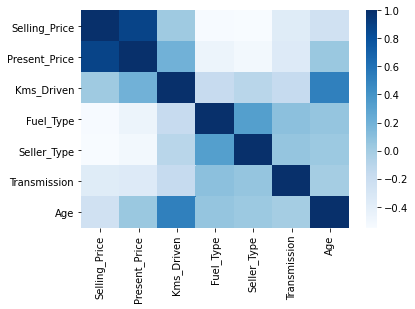

In [20]:
sns.heatmap(plot_df, cmap = "Blues")

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

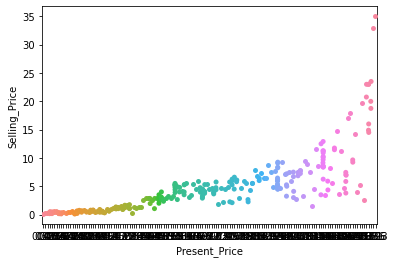

In [21]:
sns.stripplot(x="Present_Price", y="Selling_Price", data=car2_df)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

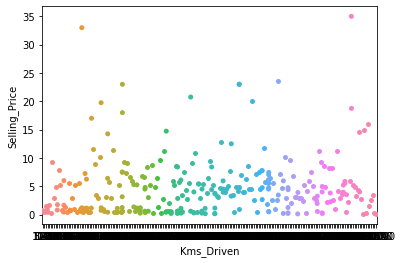

In [22]:
sns.stripplot(x="Kms_Driven", y="Selling_Price", data=car2_df)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

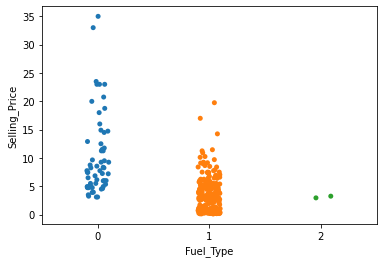

In [53]:
sns.stripplot(x="Fuel_Type", y="Selling_Price", data=car2_df)

<AxesSubplot:xlabel='Age', ylabel='Selling_Price'>

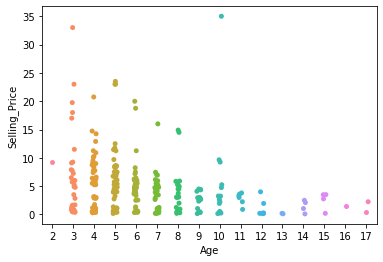

In [23]:
sns.stripplot(x="Age", y="Selling_Price", data=car2_df)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

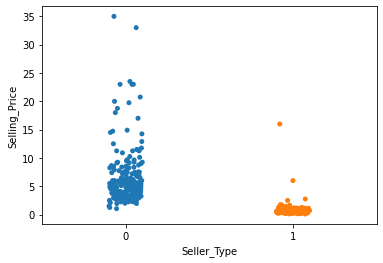

In [24]:
sns.stripplot(x="Seller_Type", y="Selling_Price", data=car2_df)

<AxesSubplot:xlabel='Selling_Price'>

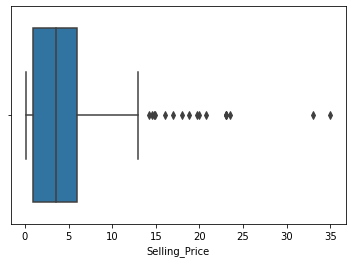

In [57]:
sns.boxplot(x="Selling_Price", data=car2_df)

<AxesSubplot:xlabel='Present_Price'>

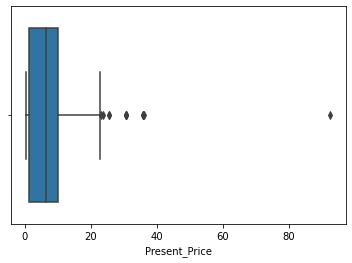

In [58]:
sns.boxplot(x="Present_Price", data=car2_df)

<AxesSubplot:xlabel='Kms_Driven'>

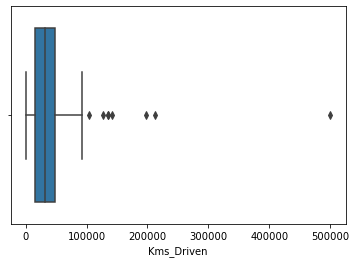

In [25]:
sns.boxplot(x="Kms_Driven", data=car2_df)

<AxesSubplot:xlabel='Age'>

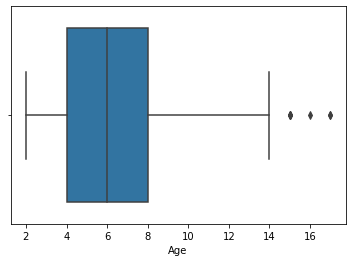

In [26]:
sns.boxplot(x="Age", data=car2_df)

In [27]:
car2_df[car2_df["Kms_Driven"] > 400000]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
196,0.17,0.52,500000,1,1,0,12


In [63]:
car2_df[car2_df["Present_Price"] > 80]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
86,35.0,92.6,78000,0,0,1,10


In [28]:
car2_df.drop(index=[86, 196], inplace=True)

In [29]:
car2_df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
0,3.35,5.59,27000,1,0,1,6
1,4.75,9.54,43000,0,0,1,7
2,7.25,9.85,6900,1,0,1,3
3,2.85,4.15,5200,1,0,1,9
4,4.60,6.87,42450,0,0,1,6
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,0,1,4
297,4.00,5.90,60000,1,0,1,5
298,3.35,11.00,87934,1,0,1,11
299,11.50,12.50,9000,0,0,1,3


<AxesSubplot:xlabel='Kms_Driven'>

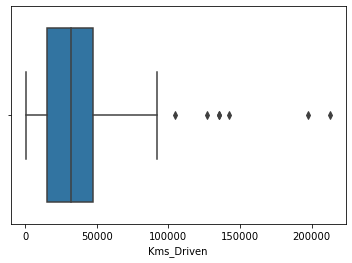

In [30]:
sns.boxplot(x="Kms_Driven", data=car2_df)

<AxesSubplot:xlabel='Present_Price'>

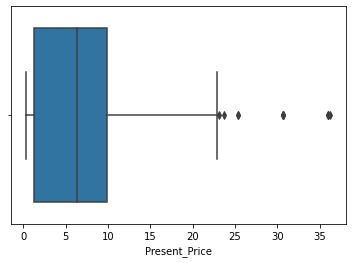

In [68]:
sns.boxplot(x="Present_Price", data=car2_df)

In [31]:
X = car2_df[["Present_Price", "Kms_Driven", "Fuel_Type", "Seller_Type", "Transmission", "Age"]]

In [32]:
Y = car2_df[["Selling_Price"]]

In [33]:
X.shape

(299, 6)

In [34]:
Y.shape

(299, 1)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42) 

In [98]:
X_train.shape

(209, 6)

In [99]:
X_test.shape

(90, 6)

In [102]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression(fit_intercept=True)
model= reg.fit(X_train, Y_train)
predict = model.predict(X_test)

In [103]:
predict

array([[ 8.64116482],
       [ 8.2121694 ],
       [ 2.29800221],
       [ 6.8400885 ],
       [ 2.18133125],
       [ 4.75034647],
       [10.92962212],
       [ 2.233213  ],
       [ 9.55268444],
       [ 0.14963292],
       [10.63475475],
       [-0.81547091],
       [ 0.57814987],
       [ 2.34600545],
       [ 9.76838352],
       [10.82625384],
       [-1.02221629],
       [ 2.0705393 ],
       [23.15221236],
       [ 1.12043041],
       [ 1.35847879],
       [ 1.76762983],
       [ 5.8644686 ],
       [ 1.81584282],
       [ 2.33940111],
       [ 8.99959626],
       [ 8.82674438],
       [ 1.78612334],
       [ 5.34675685],
       [ 4.63319492],
       [ 8.12707272],
       [ 4.65406665],
       [ 7.13389597],
       [ 1.82665346],
       [ 8.71396243],
       [ 7.00012551],
       [ 1.41825653],
       [ 0.05224275],
       [ 2.13717812],
       [20.27326613],
       [ 4.45481335],
       [18.58276398],
       [ 1.69312977],
       [ 7.28865887],
       [ 1.71759367],
       [-2

In [101]:
X_test

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
283,11.80,9010,1,0,1,4
267,9.40,19434,0,0,1,4
165,0.54,500,1,1,0,4
9,8.92,42367,0,0,1,5
77,12.35,135154,1,0,0,16
...,...,...,...,...,...,...
133,0.95,500,1,1,1,4
72,18.61,56001,1,0,1,7
15,10.79,43000,0,0,1,4
10,3.60,2135,1,0,1,3


In [108]:
from sklearn.metrics import accuracy_score

reg.score(X_test, Y_test)

0.8632052980841697

In [110]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,predict))

0.8632052980841697


In [117]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y_test,predict)

In [118]:
RMSE = MSE**(1/2)

In [119]:
RMSE

1.9773682612648946

In [36]:
car3 = car2_df.copy()

In [37]:
car3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
0,3.35,5.59,27000,1,0,1,6
1,4.75,9.54,43000,0,0,1,7
2,7.25,9.85,6900,1,0,1,3
3,2.85,4.15,5200,1,0,1,9
4,4.60,6.87,42450,0,0,1,6
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,0,1,4
297,4.00,5.90,60000,1,0,1,5
298,3.35,11.00,87934,1,0,1,11
299,11.50,12.50,9000,0,0,1,3


In [38]:
car3.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
Selling_Price,1.000000,0.883903,0.062810,-0.538757,-0.570043,-0.412520,-0.275162
Present_Price,0.883903,1.000000,0.337736,-0.486291,-0.591886,-0.453428,0.014112
Kms_Driven,0.062810,0.337736,1.000000,-0.246400,-0.212191,-0.087296,0.617777
Fuel_Type,-0.538757,-0.486291,-0.246400,1.000000,0.325395,0.110717,0.072408
Seller_Type,-0.570043,-0.591886,-0.212191,0.325395,1.000000,0.076886,0.034617
Transmission,-0.412520,-0.453428,-0.087296,0.110717,0.076886,1.000000,0.014893
Age,-0.275162,0.014112,0.617777,0.072408,0.034617,0.014893,1.000000


AttributeError: 'DataFrame' object has no attribute 'reshape'